<a href="https://colab.research.google.com/github/lintabong/Artificial-Intelligence/blob/main/Mask-RCNN/eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

In [3]:
!git clone https://github.com/matterport/Mask_RCNN.git

import os
current_dir = 'Mask_RCNN/samples'
os.chdir(current_dir)
print(current_dir)

from google.colab import drive
drive.mount('/content/drive')

import sys
import random
import math
import cv2
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

... done downloading pretrained model!


In [4]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [5]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [6]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [8]:
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
print(os.path.join(IMAGE_DIR, random.choice(file_names)))

/content/Mask_RCNN/images/9118579087_f9ffa19e63_z.jpg


In [7]:
dir = '/content/drive/MyDrive/Mask_R-CNN/mask3/evaluation_images/bear_front/'
scan_dir = dir + 'r-0-1.png'

image = skimage.io.imread(os.path.join(scan_dir))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
# print(r)
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                             class_names, r['scores'])

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


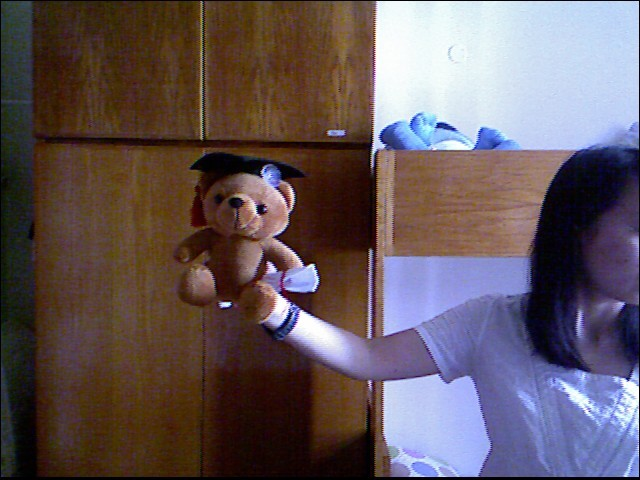

In [8]:
img = cv2.imread(scan_dir)
cv2_imshow(img)

(480, 640, 3)
480 640
3 <class 'numpy.ndarray'>
[[159 174 331 317]
 [150 190 469 630]
 [113 383 152 525]] [78  1  1]


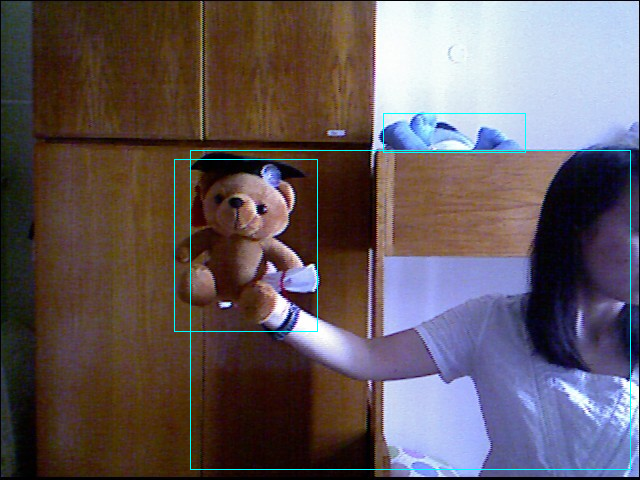

In [9]:
img = cv2.imread(scan_dir)

height, width, _ = img.shape
print(img.shape)
print(height, width)

print(len(r['rois']), type(r['rois']))
print(r['rois'], r['class_ids'])

inputClass = 0

for i in range(len(r['rois'])):
  cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)

cv2_imshow(img)

174 159 317 331


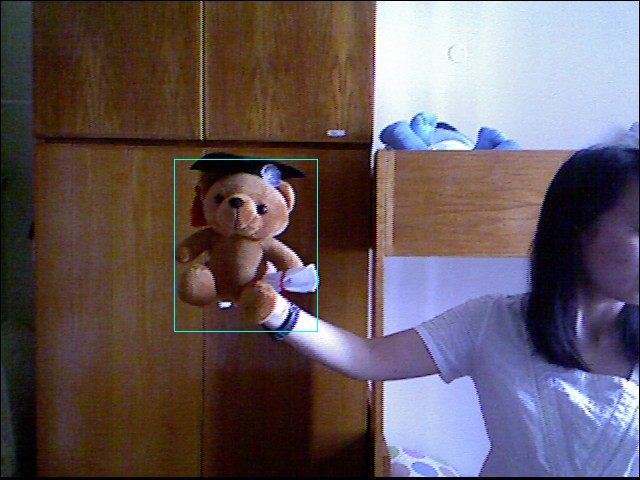

In [10]:
img = cv2.imread(scan_dir)

ic = 0
print(r['rois'][ic][1], r['rois'][ic][0], r['rois'][ic][3], r['rois'][ic][2])

cv2.rectangle(img, (r['rois'][ic][1], r['rois'][ic][0]), (r['rois'][ic][3], r['rois'][ic][2]), (255, 255, 0), 1)
cv2_imshow(img)

In [11]:
list_img = os.listdir(dir)
number_files = len(list_img)
print("jumlah gambar:", number_files)

jumlah gambar: 295


In [12]:
for r, d, f in os.walk(dir):
  print(f)

arrimg = []
final_arrimg = [""]*len(f)

for i in range(len(f)):
  nameimg = f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 5:
    nameimg = "00" + f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 6:
    nameimg = "0" + f[i].split('-')[2]

  arrimg.append(nameimg)

sorted_arrimg =sorted(arrimg)
print(sorted_arrimg)

for i in range(len(arrimg)):
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] == "0":
    get_val = sorted_arrimg[i][2:7]
    sorted_arrimg[i] = get_val
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] != "0":
    get_val = sorted_arrimg[i][1:7]
    sorted_arrimg[i] = get_val

print(sorted_arrimg)

for i in range(len(sorted_arrimg)):
  for o in range(len(f)):
    if sorted_arrimg[i] == f[o].split('-')[2]:
      final_arrimg[i] = f[o]

print(final_arrimg)

['r-500072-11.png', 'r-533410-12.png', 'r-333381-8.png', 'r-133353-4.png', 'r-433396-10.png', 'r-600086-13.png', 'r-33338-2.png', 'r-100014-3.png', 'r-300043-7.png', 'r-233367-6.png', 'r-200029-5.png', 'r-400058-9.png', 'r-0-1.png', 'r-733439-16.png', 'r-1166834-24.png', 'r-900129-19.png', 'r-1033482-21.png', 'r-1133496-23.png', 'r-1066820-22.png', 'r-700101-15.png', 'r-833453-18.png', 'r-1233511-25.png', 'r-966806-20.png', 'r-800115-17.png', 'r-633424-14.png', 'r-1633568-33.png', 'r-1333525-27.png', 'r-1433539-29.png', 'r-1266849-26.png', 'r-1566892-32.png', 'r-1366863-28.png', 'r-1733583-35.png', 'r-1533554-31.png', 'r-1833597-37.png', 'r-1466878-30.png', 'r-1766921-36.png', 'r-1666906-34.png', 'r-2066964-42.png', 'r-2033626-41.png', 'r-2133640-43.png', 'r-2166978-44.png', 'r-1933611-39.png', 'r-2433683-49.png', 'r-2400345-48.png', 'r-1866935-38.png', 'r-1966949-40.png', 'r-2233654-45.png', 'r-2300331-46.png', 'r-2333669-47.png', 'r-2900417-58.png', 'r-3000431-60.png', 'r-2533698-51.

In [ ]:
axes_export = []

for i in range(len(final_arrimg)-260):
  print("processing gambar ke", i+1)

  dir = '/content/drive/MyDrive/Mask_R-CNN/mask3/evaluation_images/bear_front/'
  scan_dir = dir + final_arrimg[i]

  image = skimage.io.imread(os.path.join(scan_dir))

  # Run detection
  results = model.detect([image], verbose=1)

  # Visualize results
  r = results[0]

  result_axes = (r['rois'][ic][1], r['rois'][ic][0], r['rois'][ic][3], r['rois'][ic][2])

  axes_export.append(result_axes)

In [33]:
ground_truth_dir = '/content/drive/MyDrive/Mask_R-CNN/mask3/evaluation_images/'
ground_truth_file = 'bear_front.txt'
combine_file = ground_truth_dir + ground_truth_file

with open(combine_file) as f:
 lines = f.read().splitlines()

print("jumlah baris:", len(lines))

arr_axes = []

for i in range(len(lines)):
  if lines[i].split(',')[0] != 'NaN':
    x = int(lines[i].split(',')[0])
    y = int(lines[i].split(',')[1])
    w = int(lines[i].split(',')[2])
    h = int(lines[i].split(',')[3])

  curr_arr = [x, y, w, h]
  arr_axes.append(curr_arr)

print(arr_axes)

jumlah baris: 281
[[178, 162, 121, 156], [178, 159, 121, 156], [178, 155, 121, 156], [179, 153, 121, 156], [180, 145, 121, 156], [180, 144, 121, 156], [180, 137, 121, 156], [180, 134, 121, 156], [174, 134, 121, 156], [171, 134, 121, 156], [171, 140, 121, 156], [171, 143, 121, 156], [165, 156, 121, 156], [165, 157, 121, 156], [159, 163, 121, 156], [156, 164, 121, 156], [150, 164, 121, 156], [141, 169, 121, 156], [131, 173, 121, 156], [120, 182, 121, 156], [110, 192, 121, 156], [110, 195, 121, 156], [101, 207, 121, 156], [103, 209, 121, 156], [103, 210, 121, 156], [112, 207, 112, 159], [117, 203, 112, 159], [122, 199, 112, 159], [131, 199, 110, 157], [135, 199, 110, 157], [146, 200, 108, 155], [153, 199, 108, 155], [160, 199, 106, 150], [164, 199, 106, 150], [169, 197, 106, 150], [174, 195, 106, 150], [179, 195, 105, 133], [191, 195, 109, 122], [191, 195, 110, 83], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65]

In [41]:
print("output lenght:", len(axes_export))

final_axes = []

for i in range(len(axes_export)):
  x = axes_export[i][0]
  y = axes_export[i][1]
  w = axes_export[i][2] - axes_export[i][0]
  h = axes_export[i][3] - axes_export[i][1]

  curr_arr = [x, y, w, h]
  final_axes.append(curr_arr)

for i in range(len(axes_export)):
  print(list(final_axes[i]), arr_axes[i])

output lenght: 35
[174, 159, 143, 172] [178, 162, 121, 156]
[176, 154, 138, 186] [178, 159, 121, 156]
[174, 166, 144, 143] [178, 155, 121, 156]
[175, 154, 142, 167] [179, 153, 121, 156]
[175, 148, 149, 201] [180, 145, 121, 156]
[196, 149, 435, 326] [180, 144, 121, 156]
[171, 141, 136, 162] [180, 137, 121, 156]
[167, 143, 145, 156] [180, 134, 121, 156]
[166, 141, 141, 204] [174, 134, 121, 156]
[165, 141, 135, 165] [171, 134, 121, 156]
[192, 150, 443, 325] [171, 140, 121, 156]
[163, 153, 140, 155] [171, 143, 121, 156]
[161, 159, 139, 171] [165, 156, 121, 156]
[161, 165, 140, 186] [165, 157, 121, 156]
[154, 172, 147, 170] [159, 163, 121, 156]
[150, 172, 144, 174] [156, 164, 121, 156]
[142, 178, 138, 160] [150, 164, 121, 156]
[137, 176, 136, 156] [141, 169, 121, 156]
[127, 171, 137, 167] [131, 173, 121, 156]
[116, 185, 141, 167] [120, 182, 121, 156]
[107, 191, 144, 168] [110, 192, 121, 156]
[108, 195, 138, 169] [110, 195, 121, 156]
[98, 207, 151, 165] [101, 207, 121, 156]
[97, 208, 142, 16

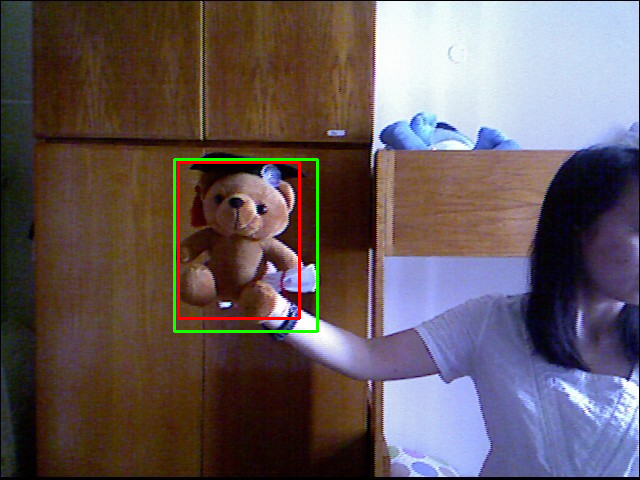

In [53]:
dir = '/content/drive/MyDrive/Mask_R-CNN/mask3/evaluation_images/bear_front/'
scan_dir = dir + final_arrimg[0]

img = cv2.imread(scan_dir)
img_buff0 = img
img_buff1 = img

x_1 = final_axes[0][0]
y_1 = final_axes[0][1]
x_2 = final_axes[0][2] + final_axes[0][0]
y_2 = final_axes[0][3] + final_axes[0][1]

cv2.rectangle(img, (x_1, y_1), (x_2, y_2), (0, 255, 26), 2)

x_1 = arr_axes[0][0]
y_1 = arr_axes[0][1]
x_2 = arr_axes[0][2] + arr_axes[0][0]
y_2 = arr_axes[0][3] + arr_axes[0][1]

cv2.rectangle(img, (x_1, y_1), (x_2, y_2), (0, 0, 255), 2)

cv2_imshow(img)



In [225]:
export_path = '/content/drive/MyDrive/Mask_R-CNN/mask3/data.txt'

with open(export_path, 'w') as fp:
  for i in range(len(axes_export)):
    textwriter = str(axes_export[i][0]) + " " + str(axes_export[i][1]) + " " + str(axes_export[i][2]) + " " + str(axes_export[i][3]) + "\n"
    fp.writelines(textwriter)